In [2]:
pip install yellowbrick

     |████████████████████████████████| 282 kB 1.3 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


Missing values in each column:
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Shape after removing missing values: (6463, 13)


/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 


Optimal number of clusters: 3

Cluster sizes:
0    2990
2    1887
1    1586
Name: Cluster, dtype: int64


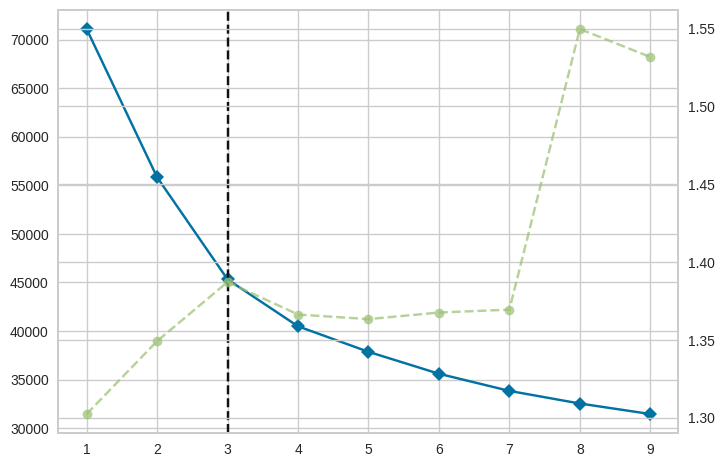

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('dataset/Wine_Quality.csv')

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Remove rows with missing values
df = df.dropna()
print("\nShape after removing missing values:", df.shape)

# Prepare the data
X = df.drop(['type', 'quality'], axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create KMeans model
model = KMeans(random_state=42)

# Use yellowbrick's KElbowVisualizer
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(X_scaled)
optimal_k = visualizer.elbow_value_

# Perform clustering with optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add clusters to original dataframe
df['Cluster'] = clusters

# Save results
df.to_csv('clustering_results.csv', index=False)

print(f"\nOptimal number of clusters: {optimal_k}")
print("\nCluster sizes:")
print(df['Cluster'].value_counts())

plt.show()

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import os

# Define the file path
file_path = os.path.join('dataset', 'diabeties.csv')

try:
    # Read the data
    print(f"Reading data from {file_path}...")
    df = pd.read_csv(file_path)
    
    # Prepare the data
    X = df.drop(['type', 'quality'], axis=1)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Create KMeans model
    model = KMeans(random_state=42)
    
    # Use yellowbrick's KElbowVisualizer
    print("Finding optimal number of clusters...")Untitled
    visualizer = KElbowVisualizer(model, k=(1,10))
    visualizer.fit(X_scaled)
    optimal_k = visualizer.elbow_value_
    
    # Perform clustering with optimal k
    print(f"Performing clustering with k={optimal_k}...")
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    # Add clusters to original dataframe
    df['Cluster'] = clusters
    
    # Save results
    output_path = os.path.join('dataset', 'clustering_results.csv')
    df.to_csv(output_path, index=False)
    
    print(f"\nOptimal number of clusters: {optimal_k}")
    print("\nCluster sizes:")
    print(df['Cluster'].value_counts())
    print(f"\nResults saved to: {output_path}")
    
    plt.show()

except FileNotFoundError:
    print(f"Error: Could not find the file at {file_path}")
    print("Please make sure:")
    print("1. The file name is correct (diabeties.csv)")
    print("2. The file is located in a folder named 'dataset'")
    print("3. The folder 'dataset' is in the same directory as this script")
    
except Exception as e:Untitled
    print(f"An error occurred: {str(e)}")

Reading data from dataset/diabeties.csv...
Error: Could not find the file at dataset/diabeties.csv
Please make sure:
1. The file name is correct (diabeties.csv)
2. The file is located in a folder named 'dataset'
3. The folder 'dataset' is in the same directory as this script


In [14]:
# Step 1: Import libraries and check missing values
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('dataset/Wine_Quality.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("\nMissing values in each column:")
print(df.isnull().sum())
print("\nDataset Info:")
df.info()

Dataset Shape: (6497, 13)

Missing values in each column:
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float

Dataset shape after dropping missing values: (6463, 13)

Finding optimal K... (This might take a moment)


/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 


Optimal number of clusters (K): 3


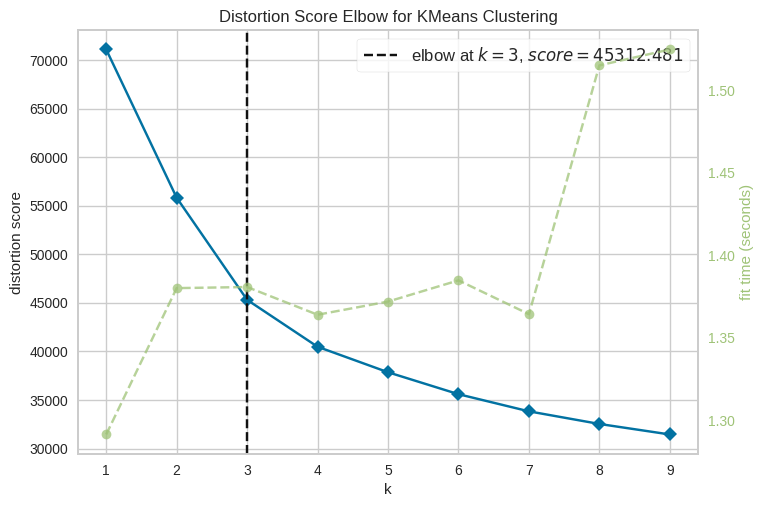


Preprocessing complete. Ready for K-means clustering.


In [15]:
# Step 2: Data preprocessing and finding optimal K

# Drop rows with missing values if any
df = df.dropna()
print("Dataset shape after dropping missing values:", df.shape)

# Prepare the features for clustering
# Drop 'type' and 'quality' as they shouldn't be used for clustering
X = df.drop(['type', 'quality'], axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)Untitled

# Create and fit KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1,10))

# Fit the data to the visualizer
print("\nFinding optimal K... (This might take a moment)")
visualizer.fit(X_scaled)

# Get the optimal k value
optimal_k = visualizer.elbow_value_
print(f"\nOptimal number of clusters (K): {optimal_k}")

# Display the elbow plot
visualizer.show()

# Keep X_scaled and optimal_k for the next step
print("\nPreprocessing complete. Ready for K-means clustering.")

In [16]:
# Step 3: Perform K-means clustering with optimal K

# Create and fit K-means model with optimal K
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

# Print cluster distribution
print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

# Calculate average quality score for each cluster
cluster_quality = df.groupby('Cluster')['quality'].mean()
print("\nAverage Quality Score per Cluster:")
print(cluster_quality)

# Function to predict cluster for new wine
def predict_wine_cluster(new_wine_data):
    # Ensure the input has all required features
    required_features = ['fixed acidity', 'volatile acidity', 'citric acid', 
                        'residual sugar', 'chlorides', 'free sulfur dioxide',
                        'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    
    # Scale the new data
    new_wine_scaled = scaler.transform(new_wine_data[required_features])
    
    # Predict cluster
    cluster = kmeans.predict(new_wine_scaled)[0]
    
    # Get average quality for predicted cluster
    predicted_quality = cluster_quality[cluster]
    
    return cluster, predicted_quality

# Example of taking user input
print("\nEnter wine characteristics:")
new_wine = {}
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
            'density', 'pH', 'sulphates', 'alcohol']

for feature in features:
    value = float(input(f"Enter {feature}: "))
    new_wine[feature] = value

# Create DataFrame with new wine data
new_wine_df = pd.DataFrame([new_wine])

# Get prediction
cluster, quality = predict_wine_cluster(new_wine_df)

print(f"\nPredicted Cluster: {cluster}")
print(f"Estimated Quality (based on cluster average): {quality:.2f}")

# Optional: Show cluster characteristics
print("\nCluster Characteristics:")
print(df.groupby('Cluster').mean())

/home/user/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster Distribution:
0    2990
2    1887
1    1586
Name: Cluster, dtype: int64

Average Quality Score per Cluster:
Cluster
0    6.060870
1    5.592055
2    5.624801
Name: quality, dtype: float64

Enter wine characteristics:


Enter fixed acidity:  7.4
Enter volatile acidity:  0.27
Enter citric acid:  0.48
Enter residual sugar:  1.1
Enter chlorides:  0.047
Enter free sulfur dioxide:  17
Enter total sulfur dioxide:  132
Enter density:  0.9914
Enter pH:  3.19
Enter sulphates:  0.49
Enter alcohol:  11.6



Predicted Cluster: 0
Estimated Quality (based on cluster average): 6.06

Cluster Characteristics:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
Cluster                                                                 
0             6.763963          0.273069     0.318020        3.367124   
1             8.362484          0.533985     0.272629        2.566520   
2             6.974669          0.281606     0.358696       11.153206   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
Cluster                                                                   
0         0.040511            28.914716             117.66689  0.992136   
1         0.089111            15.651639              47.63430  0.996823   
2         0.052905            45.549550             169.77292  0.996970   

               pH  sulphates    alcohol   quality  
Cluster                                            
0        3.211609   0.488870  11.175517  6.060870  
1  

/tmp/ipykernel_8637/3933831871.py:59: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Cluster').mean())
